In [8]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
from pathlib import Path
from scipy.stats import sem
import matplotlib.pyplot as plt
from datetime import datetime

import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

FOLDER = 'out'

In [9]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in out: 108


In [10]:
compiled_res_list = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    summary = {
        'size': res_full['train_size'],
        'representation': res_full['data_summary']['representation'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true']))
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)

In [11]:
compiled_res = pd.DataFrame(compiled_res_list)
grouped_res =compiled_res.groupby(['bins', 'num_epochs', 'representation', 'size']).agg(['mean', 'sem'])


In [12]:
grouped_res


accuracy            f1_macro  \
                                                   mean       sem      mean   
bins num_epochs representation           size                                 
2    8          Composition_Formula      50    0.000000  0.000000  0.000000   
                                         100   0.513333  0.043716  0.414528   
                                         200   0.646667  0.017638  0.552385   
                                         300   0.740000  0.030551  0.710059   
                Equilibrium_Pressure_25C 50    0.000000  0.000000  0.000000   
                                         100   0.580000  0.034641  0.505508   
                                         200   0.593333  0.054569  0.554362   
                                         300   0.613333  0.037118  0.575518   
                formula_eqPressure_25C   50    0.020000  0.011547  0.017974   
                                         100   0.533333  0.075130  0.423347   
                                         200   0.673333  0.029059  0.646311   
                                         300   0.686667  0.029059  0.660880   
     16         Composition_Formula      50    0.633333  0.033333  0.456494   
                                         100   0.653333  0.013333  0.605865   
                                         200   0.700000  0.034641  0.674705   
                                         300   0.700000  0.020000  0.674696   
                Equilibrium_Pressure_25C 50    0.540000  0.057735  0.463861   
                                         100   0.673333  0.078599  0.636698   
                                         200   0.673333  0.026667  0.661543   
                                         300   0.726667  0.043716  0.714321   
                formula_eqPressure_25C   50    0.593333  0.029059  0.514459   
                                         100   0.626667  0.043716  0.602268   
                                         200   0.720000  0.052915  0.707301   
                                         300   0.720000  0.023094  0.696095   
     25         Composition_Formula      50    0.593333  0.024037  0.547479   
                                         100   0.746667  0.026667  0.730905   
                                         200   0.720000  0.061101  0.695864   
                                         300   0.706667  0.040552  0.672453   
                Equilibrium_Pressure_25C 50    0.653333  0.033333  0.609695   
                                         100   0.720000  0.064291  0.706155   
                                         200   0.706667  0.048074  0.691662   
                                         300   0.713333  0.017638  0.685103   
                formula_eqPressure_25C   50    0.613333  0.040552  0.547114   
                                         100   0.633333  0.059255  0.557944   
                                         200   0.720000  0.061101  0.708333   
                                         300   0.746667  0.026667  0.726240   

                                                         f1_micro            \
                                                    sem      mean       sem   
bins num_epochs representation           size                                 
2    8          Composition_Formula      50    0.000000  0.000000  0.000000   
                                         100   0.032586  0.513333  0.043716   
                                         200   0.044993  0.646667  0.017638   
                                         300   0.039225  0.740000  0.030551   
                Equilibrium_Pressure_25C 50    0.000000  0.000000  0.000000   
                                         100   0.035250  0.580000  0.034641   
                                         200   0.048038  0.593333  0.054569   
                                         300   0.026816  0.613333  0.037118   
                formula_eqPressure_25C   50    0.011438  0.020000  0.011547   
                 

/tmp/ipykernel_1349829/621472445.py:39: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)
/home/jorenvanherck/.local/lib/python3.10/site-packages/matplotlib/ticker.py:2954: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


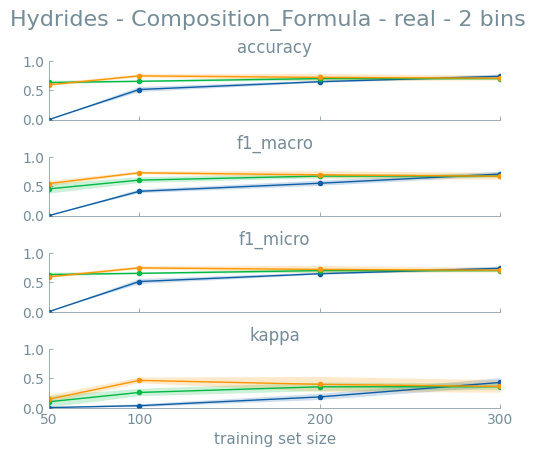

In [16]:
from scipy.stats import sem
from scipy.constants import golden
ONE_COL_WIDTH_INCH = 5
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

BINS = 2
REPRESENTATION = 'Composition_Formula'

fig, ax = plt.subplots(4, 1,figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), constrained_layout = True, sharex=True)
 
for num_epochs in [8, 16 , 25]:
    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index, 
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'],
            marker='o',
            label=f'{num_epochs} epochs'
        )
        ax[i].fill_between(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index,
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] - grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] + grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            alpha=0.2
        )
        ax[i].set_ylim(0,1)
        ax[i].set_xticks(list(compiled_res['size'].unique()))
        ax[i].set_title(metric)
    #ylabel_top('accuracy', ax=ax[0])
    #ylabel_top(r'F$_1$ macro', ax=ax[1])
    #ylabel_top(r'F$_1$ micro', ax=ax[2])
    #ylabel_top(r'$\kappa$', ax=ax[3])
ax[-1].set_xlabel('training set size')


#matplotx.line_labels(ax[0])
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)

now = datetime.now().strftime('%Y%m%d_%H%M') 
fig.suptitle('Hydrides - {} - {} - {} bins'.format(REPRESENTATION, 'real', BINS), fontsize=16)
fig.savefig(f'hydrides-{REPRESENTATION}-real-{BINS}bin-classification-results.pdf', bbox_inches='tight')

/tmp/ipykernel_1349829/3046116181.py:40: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)
/home/jorenvanherck/.local/lib/python3.10/site-packages/matplotlib/ticker.py:2954: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


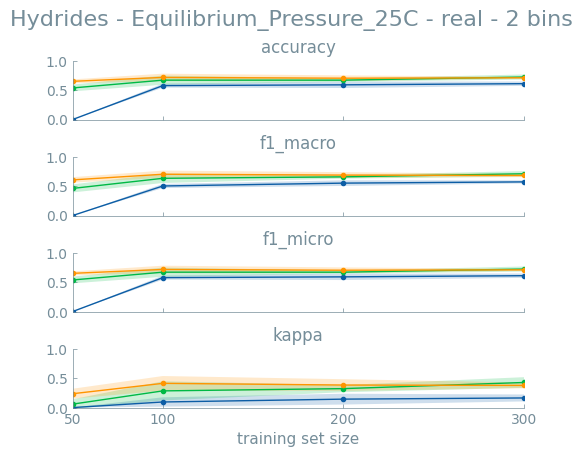

In [15]:
from scipy.stats import sem
from scipy.constants import golden
ONE_COL_WIDTH_INCH = 5
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

BINS = 2
REPRESENTATION = 'Equilibrium_Pressure_25C'

fig, ax = plt.subplots(4, 1,figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), constrained_layout = True, sharex=True)
 
for num_epochs in [8, 16 , 25]:
    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index, 
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'],
            marker='o',
            label=f'{num_epochs} epochs'
        )
        ax[i].fill_between(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index,
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] - grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] + grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            alpha=0.2
        )
        ax[i].set_ylim(0,1)
        ax[i].set_xticks(list(compiled_res['size'].unique()))
        ax[i].set_title(metric)

    #ylabel_top('accuracy', ax=ax[0])
    #ylabel_top(r'F$_1$ macro', ax=ax[1])
    #ylabel_top(r'F$_1$ micro', ax=ax[2])
    #ylabel_top(r'$\kappa$', ax=ax[3])
ax[-1].set_xlabel('training set size')


#matplotx.line_labels(ax[0])
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)

now = datetime.now().strftime('%Y%m%d_%H%M') 
fig.suptitle('Hydrides - {} - {} - {} bins'.format(REPRESENTATION, 'real', BINS), fontsize=16)
fig.savefig(f'hydrides-{REPRESENTATION}-real-{BINS}bin-classification-results.pdf', bbox_inches='tight')